# Intro to Machine Learning with Meteorological Station Data: Part 1
__Constructed and written by Eleanor Middlemas  
August 2020  
*elmiddlemas at gmail.com*__

The overarching goal of Parts 1 and 2 of the ML application lab is to become familiar with the limits and applicability of a variety of Machine Learning tools.

Part 1) __Unsupervised Learning *(this notebook)*: Grouping events into different categories__ 
<br> Can we use K-means clustering to detect the seasons in the christman dataset? <br>

__The goals of Part 1 of this Application Lab are to:__<br>
1) Learn how to utilize an unsupervised learning technique (K-means) to look for patterns in a dataset.<br>
2) Become familiar with the sensitivity of K-means to standardization, changing the input data and K.<br>
3) Understand at least one application of an unsupervised learning technique: data exploration & pattern recognition.<br>

# K-Means clustering

In the first part of this application lab, we will use [K-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) to see if the algorithm can separate some data into different seasons. This may seem trivial, because we clearly already know which observations are in which season. But the goal is for you to understand how the algorithm works and its limitations.<br><br>

![k-means_image](./images/kmeans_image.png)

# Part 0. Read in data into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import datetime

Read in the data.

In [2]:
df = pd.read_csv("./christman_2016.csv")
# preview data (also through df.head() & df.tail())
df

,day,hour,temp_F,RH,dewtemp_F,wind_mph,wind_dir,windgust,windgust_dir,pres_Hg,SOLIN_Wm2,Prec_inches
0,42370,0.000000,7.0,72.2,-0.1,1.2,234,3.9,224,851.30,0.0,0.0
1,42370,0.041667,5.4,74.3,-1.0,3.4,299,7.1,302,850.82,0.0,0.0
2,42370,0.083333,6.4,73.8,-0.2,2.8,200,7.0,301,849.83,0.0,0.0
3,42370,0.125000,3.0,73.5,-3.6,2.9,309,6.1,349,850.69,0.0,0.0
4,42370,0.166667,3.7,76.9,-1.9,3.1,346,5.3,255,848.24,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,42735,0.791667,22.3,74.3,15.4,0.9,221,3.3,202,833.32,0.0,0.0
8780,42735,0.833333,20.3,80.4,15.3,0.6,279,2.9,279,833.45,0.1,0.0
8781,42735,0.875000,19.9,81.1,15.1,0.5,197,2.5,279,833.01,0.1,0.0
8782,42735,0.916667,17.8,82.8,13.5,2.0,353,4.8,352,832.78,0.1,0.0


## Deal with the time dimension

How many days are in this dataset?

In [3]:
df.day.nunique()

366

__Optional__: transform the day column into a readable date. Can only run once successfully.

In [4]:
df['day'] = [datetime.date.fromordinal(day+693594) for day in df['day']]

---------------------------------------------

# Part 1. Unsupervised learning 
#### *Using K-means to look for patterns in the data*

In [5]:
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

Only select noons, or when hour is equal to 0.5.

In [6]:
noondf = df[df.hour==0.5]
#noondf = df # try selecting all data instead of just noon data

Convert to numpy array for model input, leaving out the time dimensions day & hour, and wind directions.

In [7]:
included_cols = ['temp_F','RH','dewtemp_F','wind_mph','windgust','pres_Hg','SOLIN_Wm2','Prec_inches'] # original input
#included_cols = ['temp_F','RH','dewtemp_F','wind_mph','windgust','pres_Hg','Prec_inches'] # try removing insolation as a feature
data = noondf.loc[:, noondf.columns.isin(list(included_cols))].to_numpy()
datashape = np.shape(data)
np.shape(data)

(366, 8)

## Standardize or normalize data

Since clustering among features depends on distance, we need to standardize all of our features so that variance across features is equal. We don't want the clustering to be dominated by the feature with the largest variance. 

In [8]:
normal_data = whiten(data) # sci-kit learn's normalization feature in the clustering toolbox
#normal_data = data # can uncomment this to avoid normalization
np.shape(normal_data) # great, we end up with the same shape as our original data.

(366, 8)

There are 366 observations over 8 variables, or "features", as they're called in the ML world.

## Look for patterns with k-means

In [9]:
NO_CLUSTERS = 4 # 2 for separating cold & warm seasons, 4 for separating into all four seasons
centroids, _  = kmeans(normal_data,NO_CLUSTERS,iter=20)
idx, _ = vq(normal_data,centroids) # returns season for each observation
print(idx) # prints K-mean's season label for each day in the year (Jan - December 2016)

[2 2 2 2 2 1 1 1 1 1 1 2 1 3 1 1 1 1 1 2 2 2 2 1 3 2 2 2 3 2 1 1 1 3 2 2 1
 3 1 2 3 2 2 1 3 3 2 2 3 2 3 2 3 3 2 2 2 2 2 3 2 3 2 2 2 2 3 2 2 2 2 2 3 3
 3 3 1 2 3 2 3 3 3 2 2 1 2 2 2 3 3 3 2 2 0 3 2 0 2 0 2 1 0 0 0 1 3 1 2 0 2
 0 0 2 2 0 3 1 1 1 1 1 2 0 0 0 0 1 1 0 3 2 0 0 1 1 1 1 0 0 0 0 0 0 0 0 2 3
 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 2 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0
 0 2 0 0 0 0 1 0 2 0 0 0 0 0 2 0 0 0 2 2 1 2 2 2 3 0 1 0 2 0 3 3 2 2 2 2 2
 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 1 1 2 1 2 3 2 3 2 2 1 3
 3 2 2 1 1 2 3 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 1 2 2 3 2 2 3 2 2 1]


Create a few xy scatter plots, where points are colored by season (which we know), and each k-means-determined centroid is in a black dot overlaid.

First, as a form of validation, I want some indication of what the season actually is in the dataset. Thus, for plotting later, let's create an array with each marker corresponding to each different season.

In [10]:
# create mapping of season according to month in year
if NO_CLUSTERS==4:
    seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
else:
    seasons = [1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1]
month_to_season = dict(zip(range(1,13), seasons))

# Apply mapping to the "day" column in dataframe to obtain season
seasons_in_dataset = pd.DatetimeIndex(noondf['day']).month.map(month_to_season)
print("Actual seasons in dataset:")
print(seasons_in_dataset.values)

# replace season with markers for plotting
markerstyles = ['o','*','x','^']
markers = [""]*datashape[0]
for x in range(1,NO_CLUSTERS+1):
    markers = np.where(seasons_in_dataset==x,markerstyles[x-1],markers)

Actual seasons in dataset:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [11]:
from matplotlib.lines import Line2D # for creating custom legend

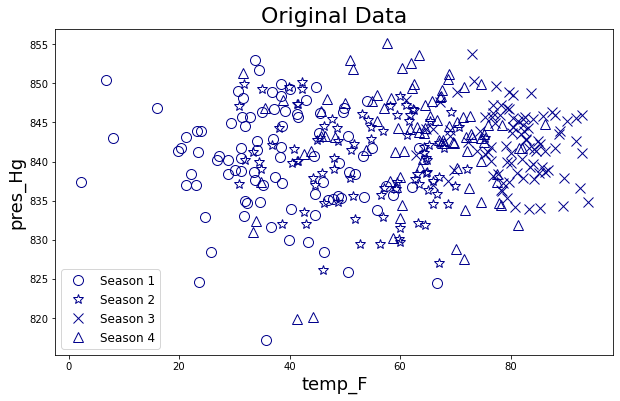

In [12]:
vars2plot = ['temp_F','pres_Hg'] # format (x, y)
# You may also try plotting different variables. Just ensure they are listed 
# in "included_cols" in the cell above.

plt.figure(figsize=(10,6))
data2plot = [data[:,included_cols.index(var)] for var in vars2plot]
for (ind,val) in enumerate(np.transpose(data2plot)):
    plt.plot(val[0],val[1],color="darkblue",marker=markers[ind], 
             markersize=10,markerfacecolor = 'none')

plt.xlabel(vars2plot[0],fontsize=18)
plt.ylabel(vars2plot[1],fontsize=18)

yvals = plt.ylim()
xvals = plt.xlim()

legend_elements = [Line2D([0], [0], marker=markerstyles[x], color="darkblue", 
                          label="Season {}".format(x+1),
                          markerfacecolor='None', markersize=10, linestyle='') 
                   for x in range(NO_CLUSTERS)]
plt.legend(handles=legend_elements, loc='lower left',fontsize=12)

plt.title('Original Data',fontsize=22)
plt.show()

The shapes of the points above indicate the actual season in the dataset. <br>When `NO_CLUSTERS`=2, Season 1 = winter, and Season 2 = summer. <br>When `NO_CLUSTERS`=4, Seasons 1 - 4 correspond to winter, spring, summer, fall, respectively.

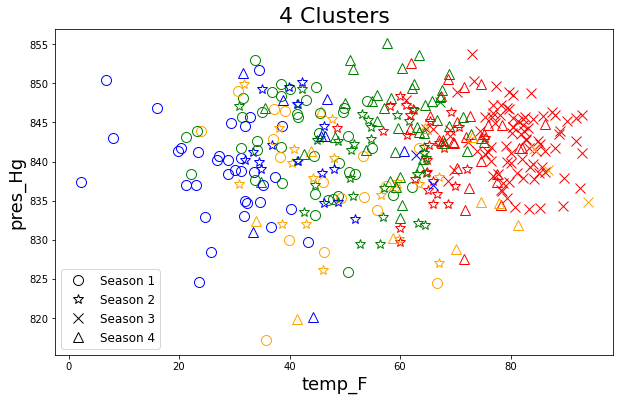

In [13]:
cols = ['red','blue','green','orange']


plt.figure(figsize=(10,6))
plt.title(str(NO_CLUSTERS) + ' Clusters',fontsize=22)
for (ind,val) in enumerate(np.transpose(data2plot)):
    plt.plot(val[0],val[1],".", marker=markers[ind], color=cols[idx[ind]], 
             markersize=10, markerfacecolor = 'none')

    
plt.xticks()
plt.yticks()

plt.xlabel(vars2plot[0],fontsize=18);
plt.ylabel(vars2plot[1],fontsize=18);

legend_elements = [Line2D([0], [0], marker=markerstyles[x], color="black", 
                          label="Season {}".format(x+1),
                          markerfacecolor='None', markersize=10, linestyle='') 
                   for x in range(NO_CLUSTERS)]
plt.legend(handles=legend_elements, loc='lower left',fontsize=12);

In the plot above, the colors correspond to the seasons predicted by the K-means clustering algorithm, while the shapes of the points indicate the actual season. Again, <br>when `NO_CLUSTERS`=2, Season 1 = winter, and Season 2 = summer. <br>When `NO_CLUSTERS`=4, Seasons 1 - 4 correspond to winter, spring, summer, fall, respectively.

## Unsupervised Learning Questions:

In [14]:
from solutions import unsupervised

1. __Do a quick search online for the definition of a "centroid" for K-means clustering. What is a centroid?__

In [15]:
unsupervised.answer1()

[Here is a link to the wiki page](https://en.wikipedia.org/wiki/Cluster_analysis#Centroid-based_clustering). Centroids are what are used to define the clusters in K-means clustering. A point is grouped into a specific cluster based on that point's distance from the centroid. In our case, we randomly start with some centroids, and then the algorithm repeatedly chooses new centroids in order to minimize the distances between points and each centroid.

2. __What would happen if you didn't select only daily data, but instead included hourly data?__

In [16]:
unsupervised.answer2()

The diurnal cycle would dominate over seasonality and k-means would struggle to correctly separate seasons.

3. __What happens when you don't standardize the data beforehand? Why should you standardize the data?__

In [ ]:
unsupervised.answer3()

4. __What happens when you change the number of clusters from two to four? Why do you think the algorithm yields different results?__

In [ ]:
unsupervised.answer4()

5. __What happens when you remove certain features? Does the model perform better or worse at detecting seasons?__

In [ ]:
unsupervised.answer5()